<a href="https://colab.research.google.com/github/NodiraTillayeva/Data-Science-Roadmap/blob/main/EPAM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [1]:
%pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 4.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import docx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2

## EDA

### Read files


In [3]:
air_quality = pd.read_csv("/content/AirQualityUCI.csv", delimiter=';')

In [4]:
air_quality.head()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578          NaN          NaN  
1  0,7255          NaN          NaN  
2  0,7502          NaN          NaN  
3  0,7867          NaN          NaN  
4  0,7888          NaN          NaN

In [5]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


### Statistics

In [6]:
air_quality.describe()

PT08.S1(CO)     NMHC(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)  \
count  9357.000000  9357.000000    9357.000000  9357.000000   9357.000000   
mean   1048.990061  -159.090093     894.595276   168.616971    794.990168   
std     329.832710   139.789093     342.333252   257.433866    321.993552   
min    -200.000000  -200.000000    -200.000000  -200.000000   -200.000000   
25%     921.000000  -200.000000     711.000000    50.000000    637.000000   
50%    1053.000000  -200.000000     895.000000   141.000000    794.000000   
75%    1221.000000  -200.000000    1105.000000   284.000000    960.000000   
max    2040.000000  1189.000000    2214.000000  1479.000000   2683.000000   

           NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  Unnamed: 15  Unnamed: 16  
count  9357.000000   9357.000000  9357.000000          0.0          0.0  
mean     58.148873   1391.479641   975.072032          NaN          NaN  
std     126.940455    467.210125   456.938184          NaN          NaN  
min    -200.000000   -200.000000  -200.000000          NaN          NaN  
25%      53.000000   1185.000000   700.000000          NaN          NaN  
50%      96.000000   1446.000000   942.000000          NaN          NaN  
75%     133.000000   1662.000000  1255.000000          NaN          NaN  
max     340.000000   2775.000000  2523.000000          NaN          NaN

In [7]:
# Function to read the contents of a DOCX file
def read_docx(file_path):
    doc = docx.Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return '\n'.join(full_text)


In [8]:

# Path to the DOCX file
file_path = '/content/Dataset description.docx'

# Reading the contents of the file
docx_content = read_docx(file_path)
docx_content[:]  # Displaying the first 500 characters for an overview

"Main link: https://archive.ics.uci.edu/ml/datasets/Air+Quality#\nData Set Information:\nThe dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Miss

### Univariate Analysis

### Attribute Information:

0. Date (DD/MM/YYYY)
1. Time (HH.MM.SS)
2. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7. True hourly averaged NOx concentration in ppb (reference analyzer)
8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12. Temperature in  °C
13. Relative Humidity (%)
14. AH Absolute Humidity

### Exploring the target variable

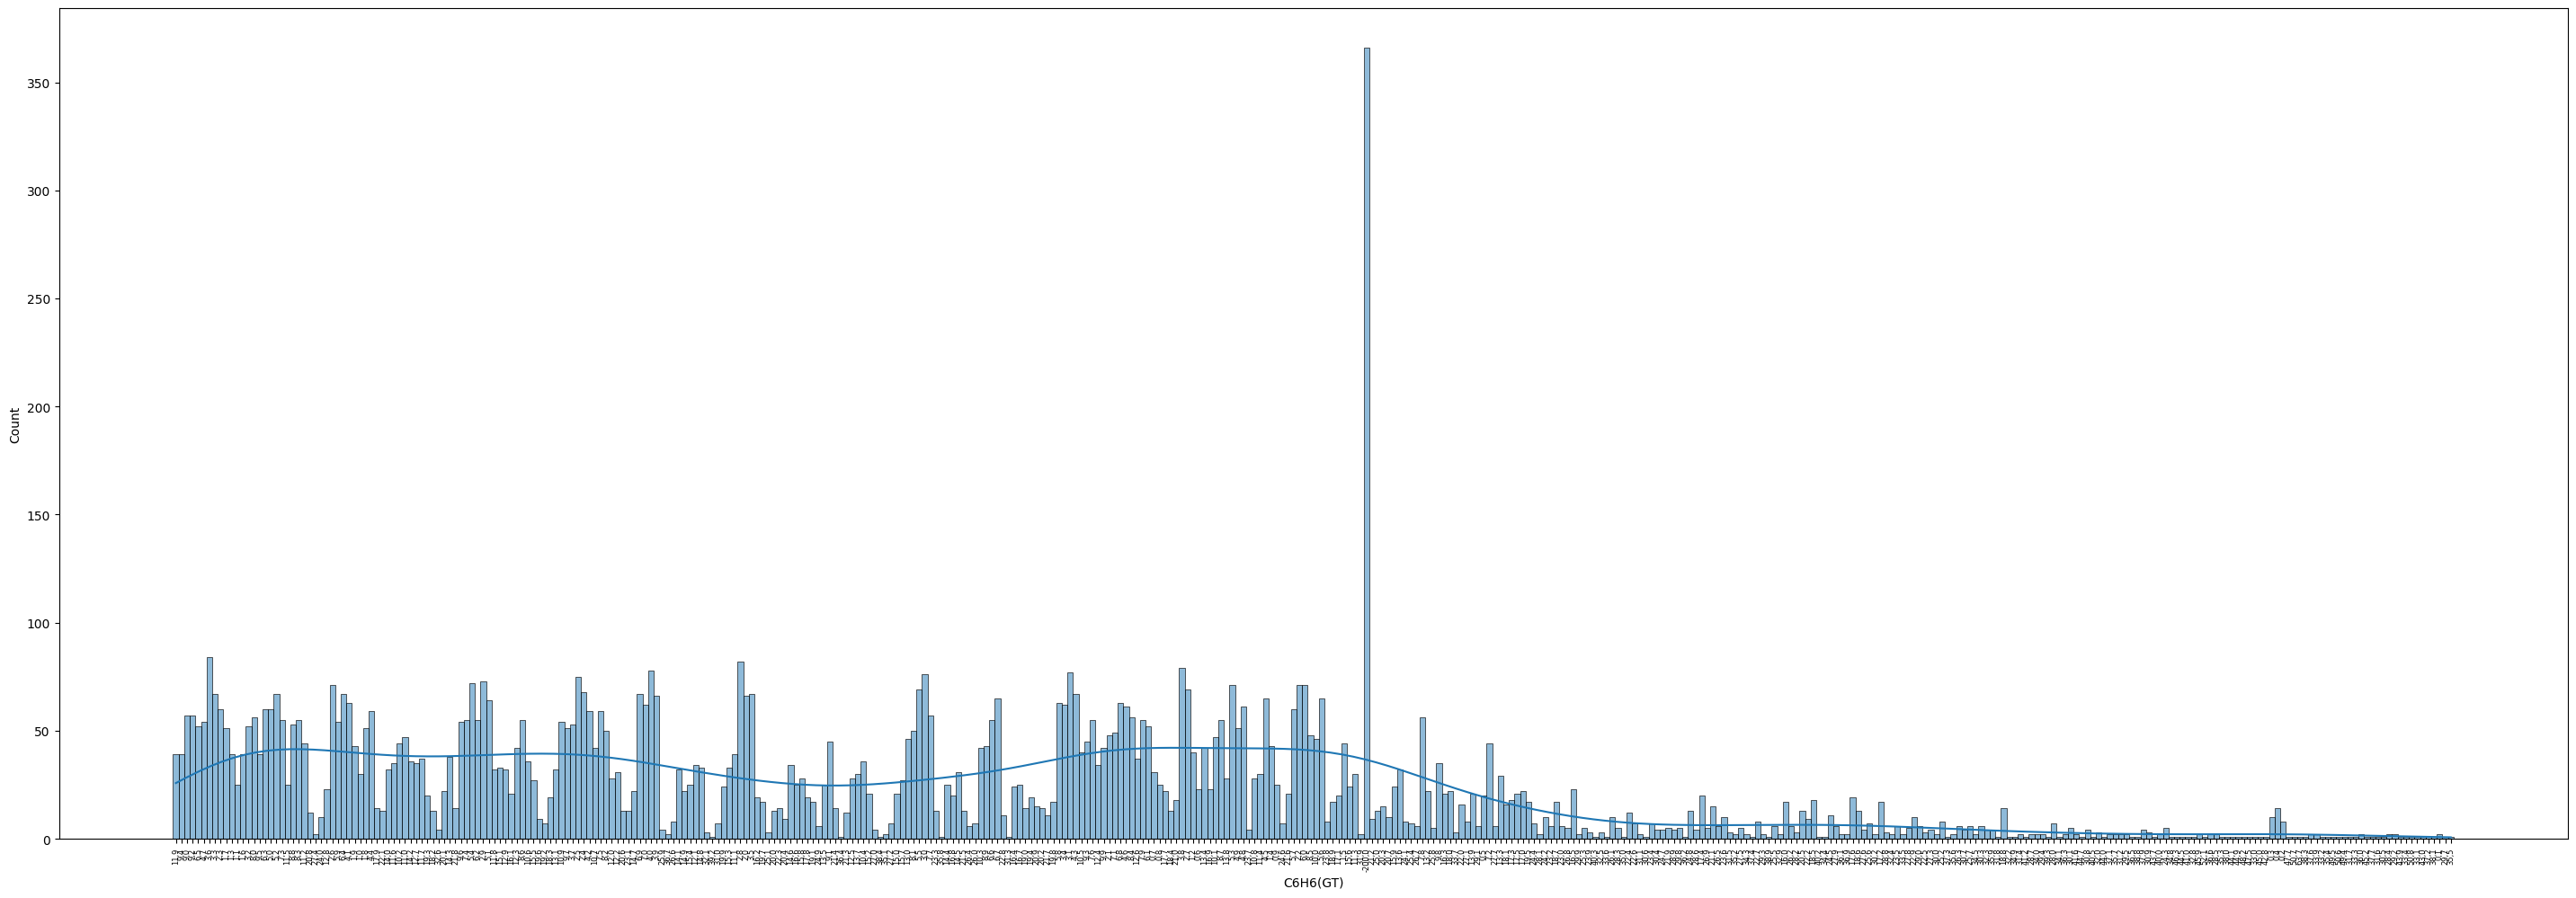

In [9]:

plt.figure(figsize=(36,12))
sns.histplot(air_quality["C6H6(GT)"], kde=True)
plt.xticks(rotation=90, fontsize=6)
plt.show()

The plot is odd as C6H6(GT) is presented with ',' sign so we need to fix numerical values

### Fixing numeric values

In [10]:
numeric_columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                   'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
                   'T', 'RH', 'AH']


In [11]:
for col in numeric_columns:
    air_quality[col] = air_quality[col].astype(str)  # Convert to string if not already
    air_quality[col] = air_quality[col].str.replace(',', '.').astype(float)
    air_quality[col] = air_quality[col].replace(-200, np.nan)


In [12]:
air_quality.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

<Axes: xlabel='C6H6(GT)', ylabel='Count'>

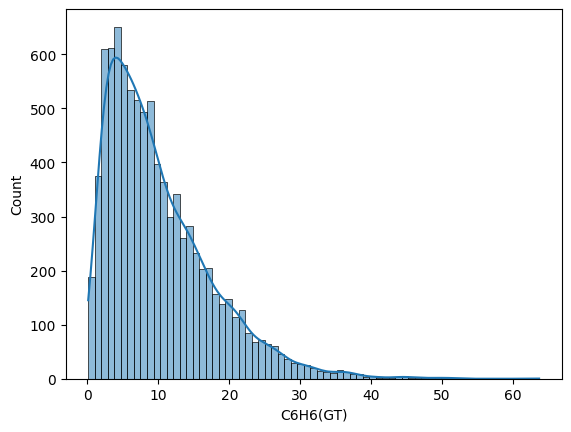

In [13]:
sns.histplot(air_quality["C6H6(GT)"], kde=True)

<Axes: xlabel='C6H6(GT)'>

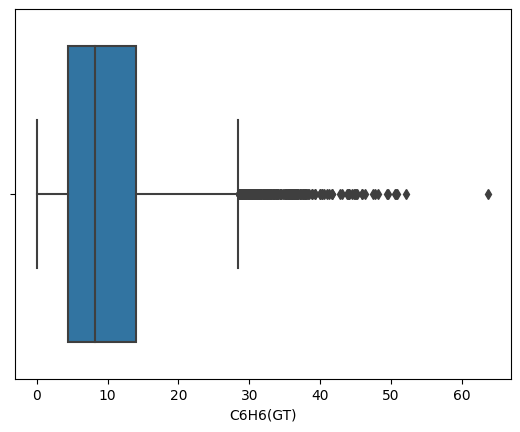

In [14]:
sns.boxplot(x=air_quality["C6H6(GT)"])

### Vizualizations

In [15]:
def plot_columns(df):
    for col in df.columns:
        # Skip the date column
        if col == "Date":
            continue

        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            plt.figure(figsize=(10, 4))
            sns.histplot(df[col], kde=True)
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
        else:
            # Handle non-numeric columns (optional, based on your data)
            plt.figure(figsize=(10, 4))
            sns.countplot(x=col, data=df)
            plt.title(f'Count Plot of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')

        plt.show()


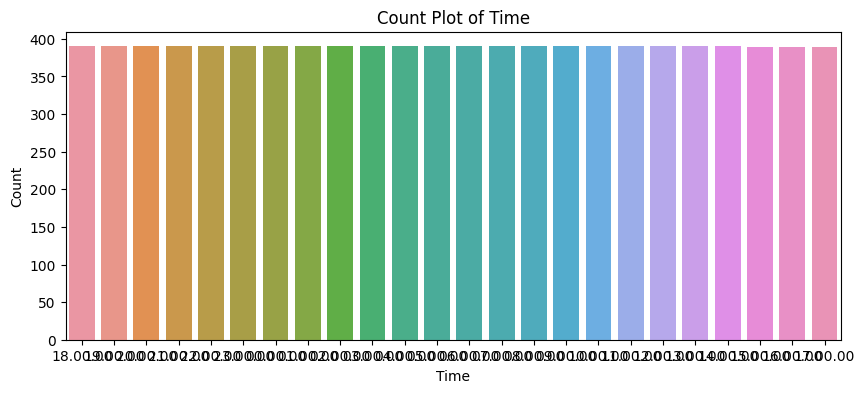

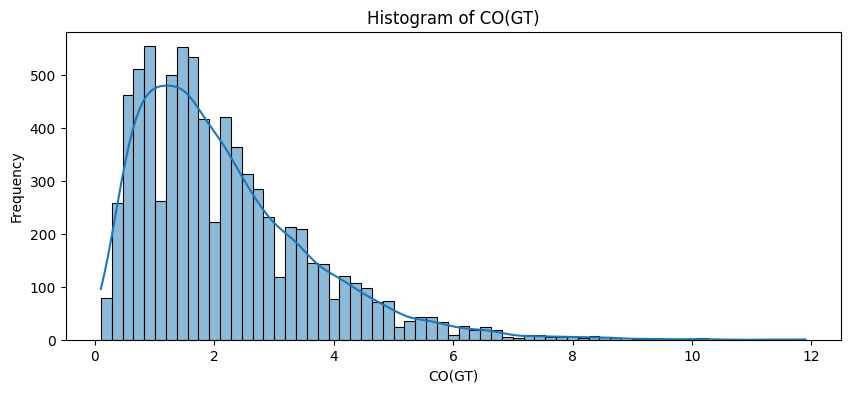

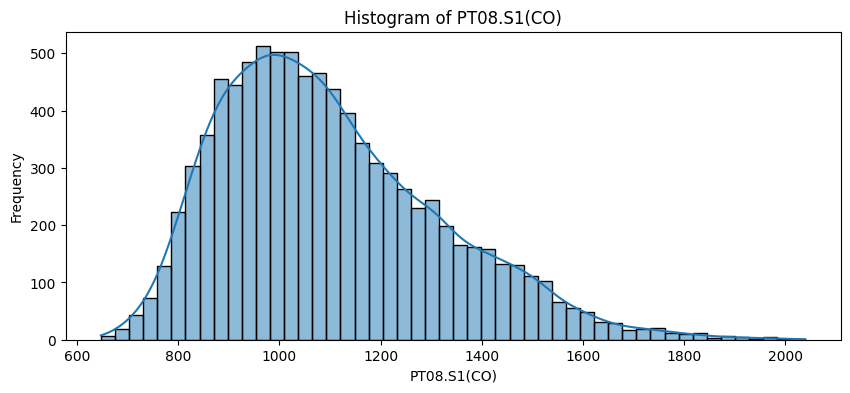

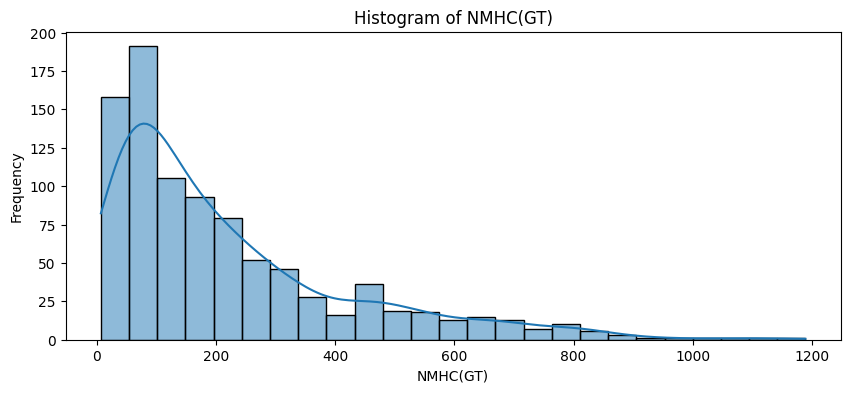

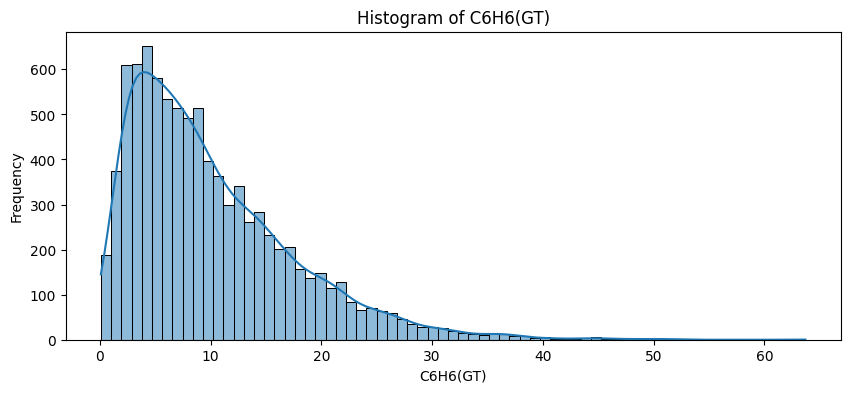

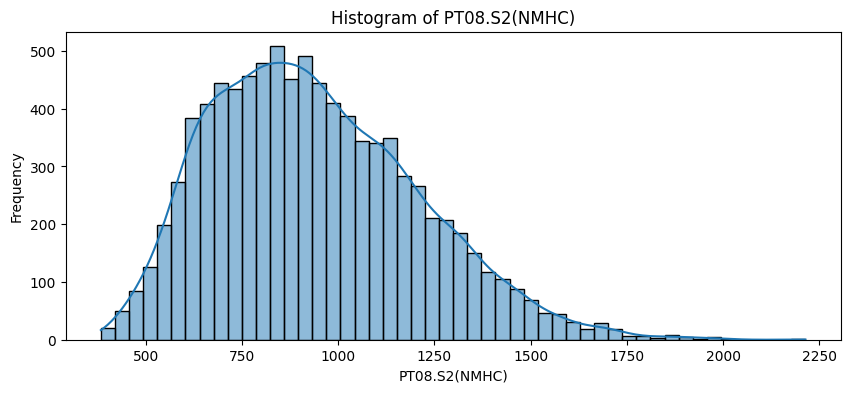

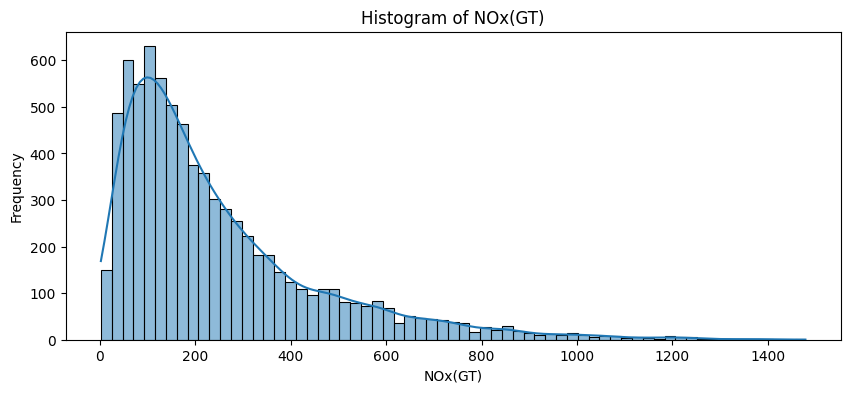

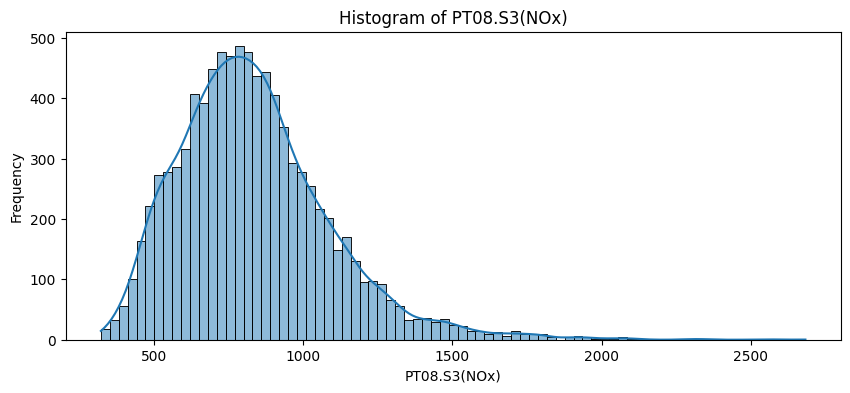

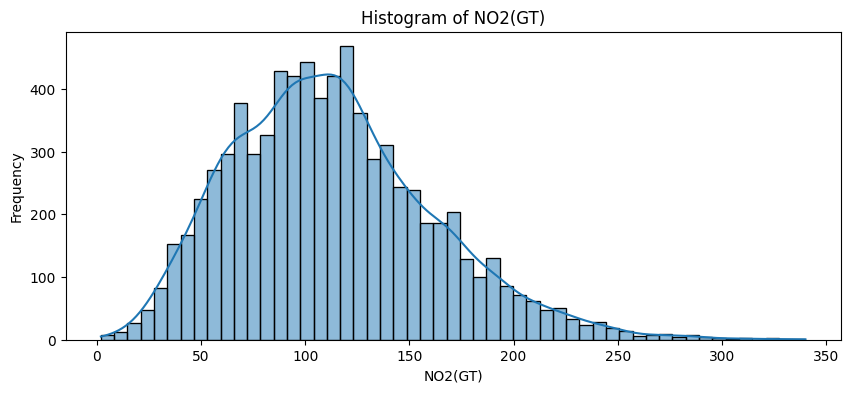

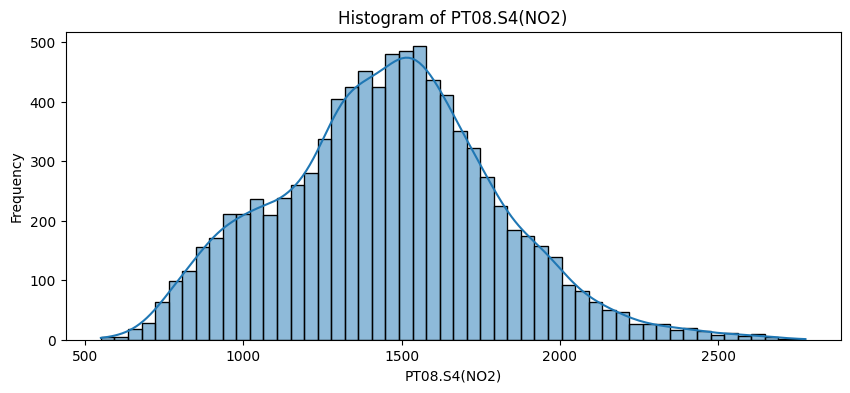

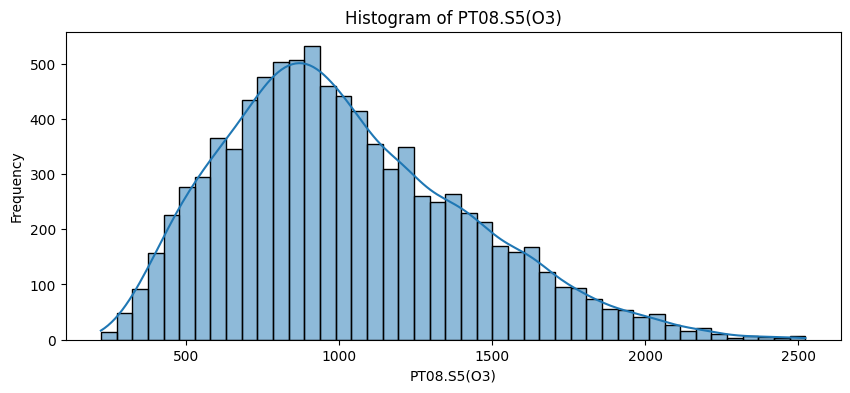

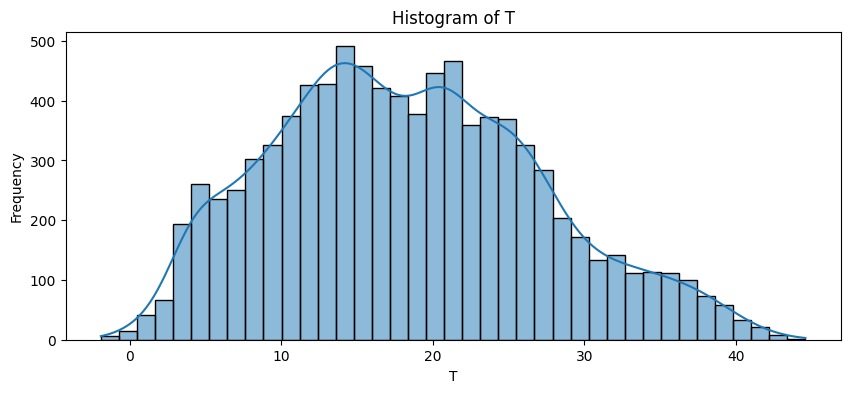

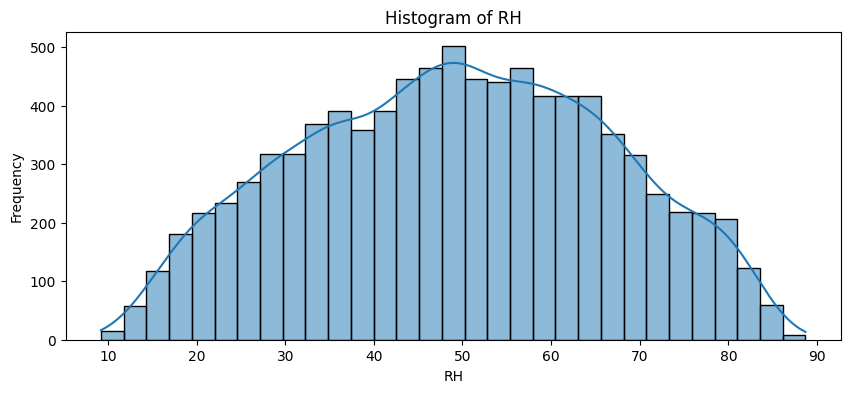

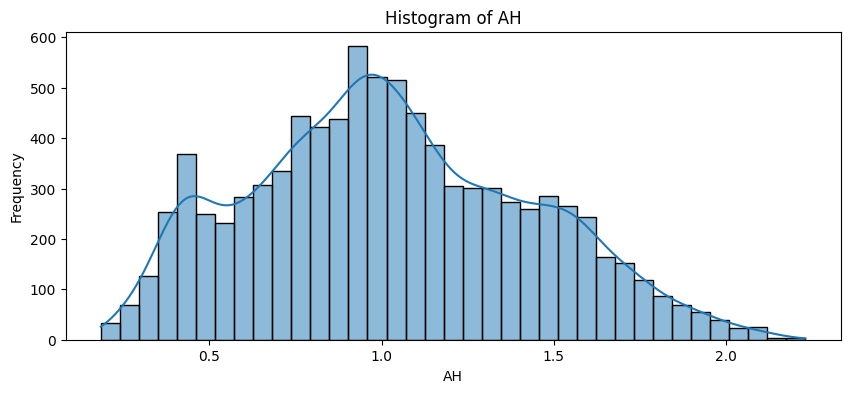

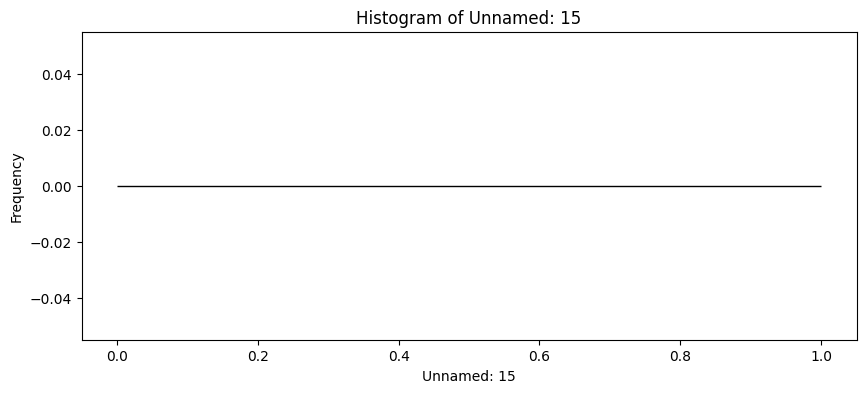

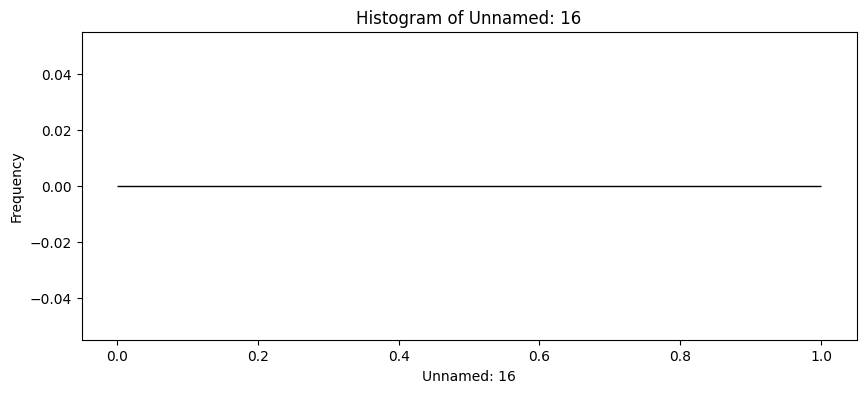

In [16]:
plot_columns(air_quality)

I wsnt to drop last 2 as they dont have any data

In [17]:
air_quality=air_quality.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In the tail there are a lot of nan values. THese rows can be dropped

In [18]:
# Drop rows where all columns are NaN
air_quality = air_quality.dropna(how='all')

In [19]:
air_quality

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9352  04/04/2005  10.00.00     3.1       1314.0       NaN      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0       NaN      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0       NaN      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0       NaN       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0       NaN      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  0.7255  
2          1074.0  11.9  54.0  0.7502  
3          1203.0  11.0  60.0  0.7867  
4          1110.0  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028  

[9357 rows x 15 columns]

## Multivariate Analysis


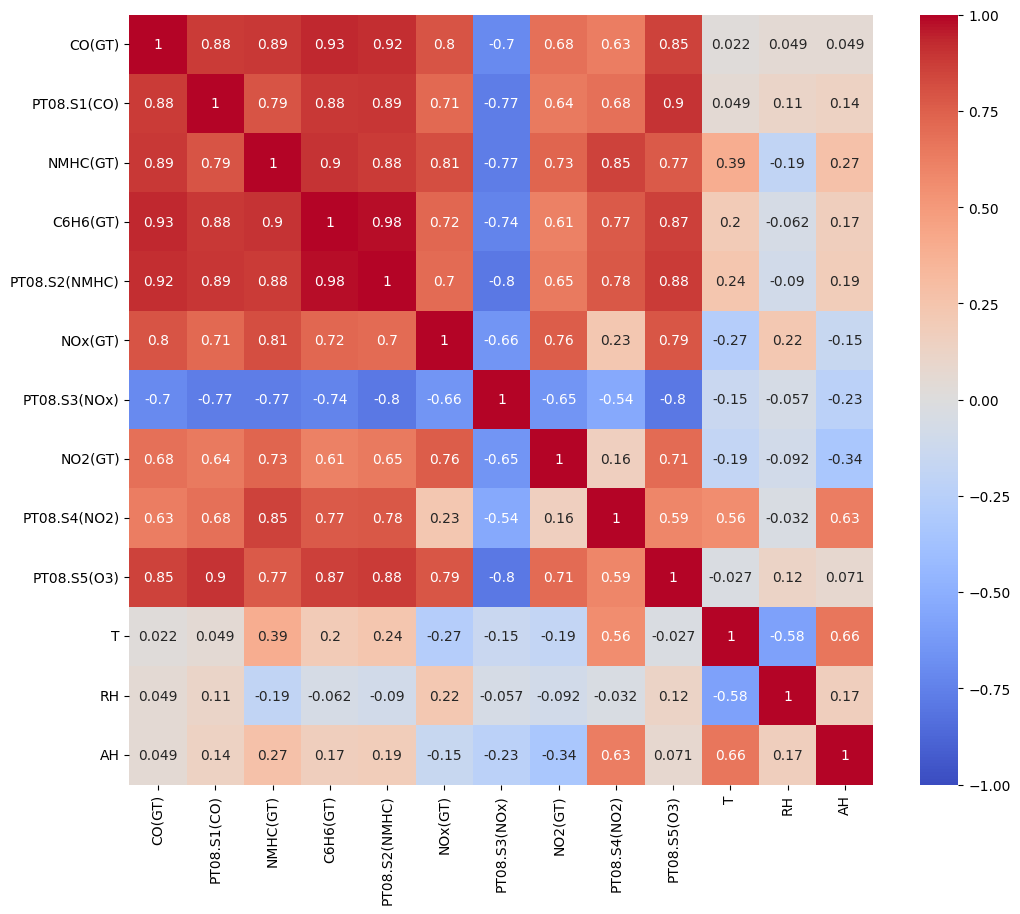

In [20]:
spearman_corr = air_quality.corr(method='pearson', numeric_only=True)

# Create the heatmap
plt.figure(figsize=(12, 10))  # You can adjust the figure size as needed
sns.heatmap(spearman_corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm")

# Show the plot
plt.show()

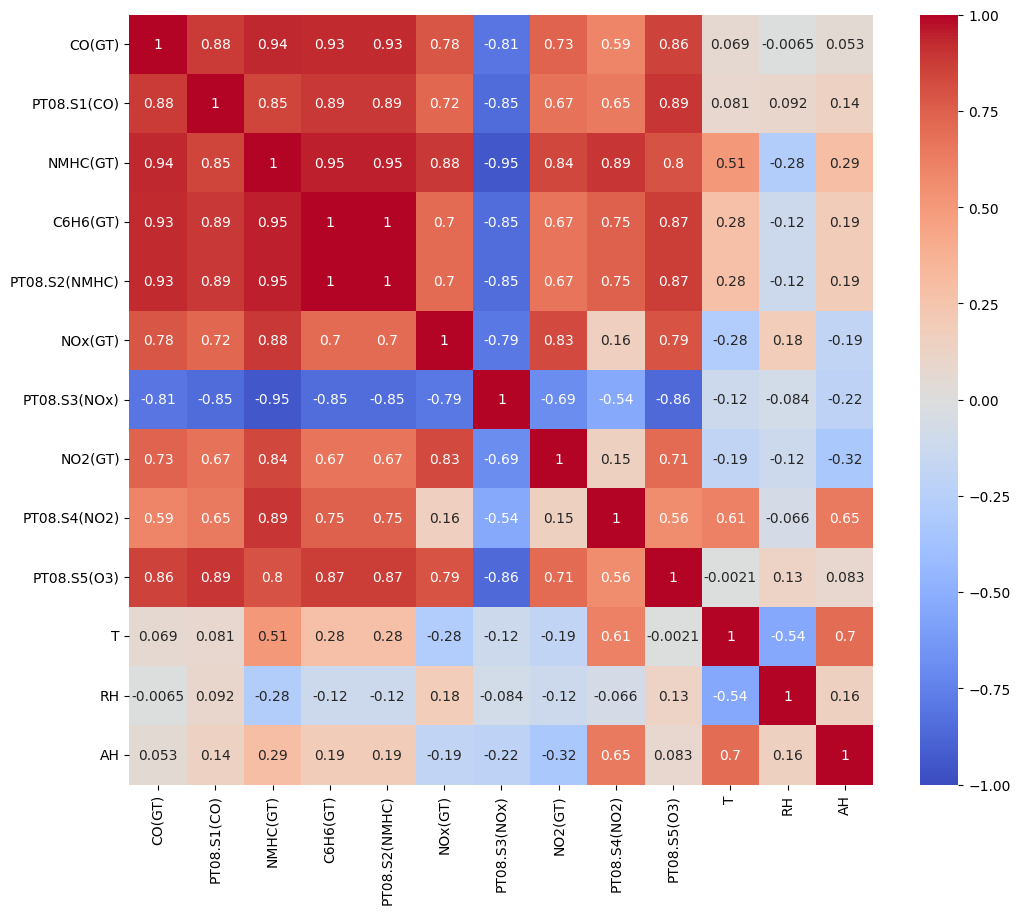

In [21]:
spearman_corr = air_quality.corr(method='spearman', numeric_only=True)

# Create the heatmap
plt.figure(figsize=(12, 10))  # You can adjust the figure size as needed
sns.heatmap(spearman_corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm")

# Show the plot
plt.show()

## Seeing the correlations it is wise to combine or get rid of some variables

C6H6(GT) has very high correlations with PT08.S2(NMHC), NMHC(GT), and CO(GT). Since PT08.S2(NMHC) has the highest correlation (0.98), it might be the primary candidate for the predictive model.

However, NMHC(GT) and CO(GT) also have high correlations with the target and might be considered redundant due to their high correlation with PT08.S2(NMHC). To avoid multicollinearity, we might exclude NMHC(GT) and CO(GT) and keep PT08.S2(NMHC).

NOx(GT) and NO2(GT) have moderately high correlations with C6H6(GT) and might be included as additional predictors.

The temperature (T), relative humidity (RH), and absolute humidity (AH) have lower correlations with C6H6(GT). These could potentially be included as they might capture different aspects of the data that are not accounted for by the other variables.

In [22]:
# Columns to keep based on the previous analysis
columns_to_keep = ['Date', 'Time','C6H6(GT)', 'NOx(GT)', 'PT08.S2(NMHC)', 'NO2(GT)', 'T', 'RH', 'AH']

# Creating a new DataFrame with only the selected columns
air_quality_useful = air_quality[columns_to_keep]

In [23]:
air_quality_useful

Date      Time  C6H6(GT)  NOx(GT)  PT08.S2(NMHC)  NO2(GT)     T  \
0     10/03/2004  18.00.00      11.9    166.0         1046.0    113.0  13.6   
1     10/03/2004  19.00.00       9.4    103.0          955.0     92.0  13.3   
2     10/03/2004  20.00.00       9.0    131.0          939.0    114.0  11.9   
3     10/03/2004  21.00.00       9.2    172.0          948.0    122.0  11.0   
4     10/03/2004  22.00.00       6.5    131.0          836.0    116.0  11.2   
...          ...       ...       ...      ...            ...      ...   ...   
9352  04/04/2005  10.00.00      13.5    472.0         1101.0    190.0  21.9   
9353  04/04/2005  11.00.00      11.4    353.0         1027.0    179.0  24.3   
9354  04/04/2005  12.00.00      12.4    293.0         1063.0    175.0  26.9   
9355  04/04/2005  13.00.00       9.5    235.0          961.0    156.0  28.3   
9356  04/04/2005  14.00.00      11.9    265.0         1047.0    168.0  28.5   

        RH      AH  
0     48.9  0.7578  
1     47.7  0.7255  
2     54.0  0.7502  
3     60.0  0.7867  
4     59.6  0.7888  
...    ...     ...  
9352  29.3  0.7568  
9353  23.7  0.7119  
9354  18.3  0.6406  
9355  13.5  0.5139  
9356  13.1  0.5028  

[9357 rows x 9 columns]

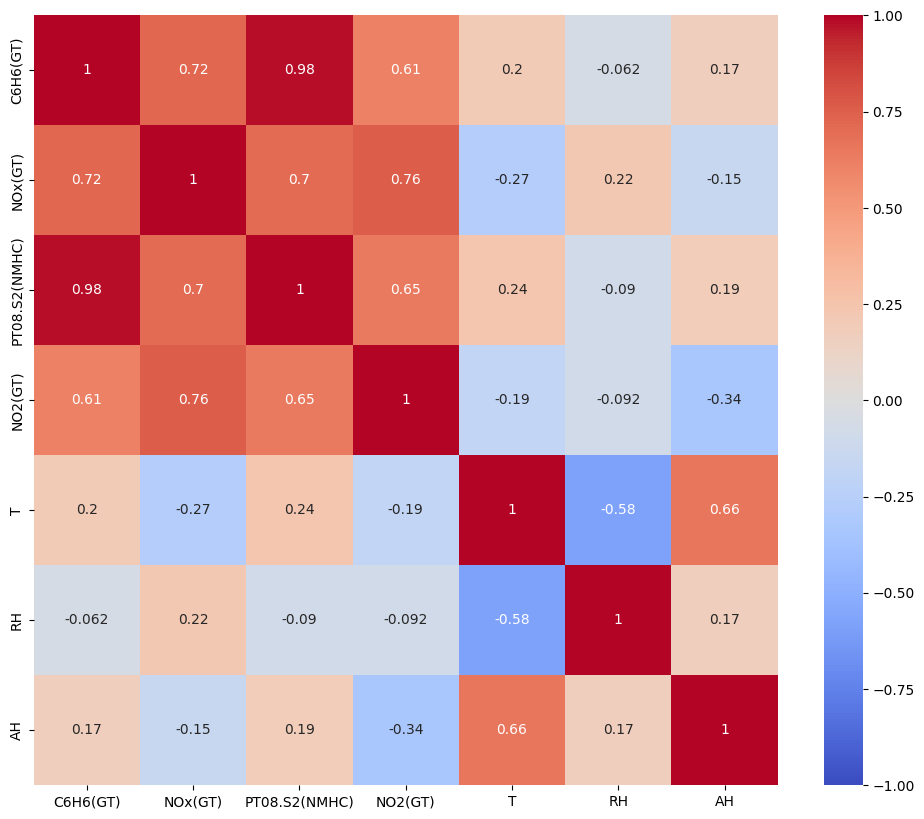

In [24]:
spearman_corr = air_quality_useful.corr(method='pearson', numeric_only=True)

# Create the heatmap
plt.figure(figsize=(12, 10))  # You can adjust the figure size as needed
sns.heatmap(spearman_corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm")

# Show the plot
plt.show()

### Features - Target

<Axes: xlabel='PT08.S2(NMHC)', ylabel='C6H6(GT)'>

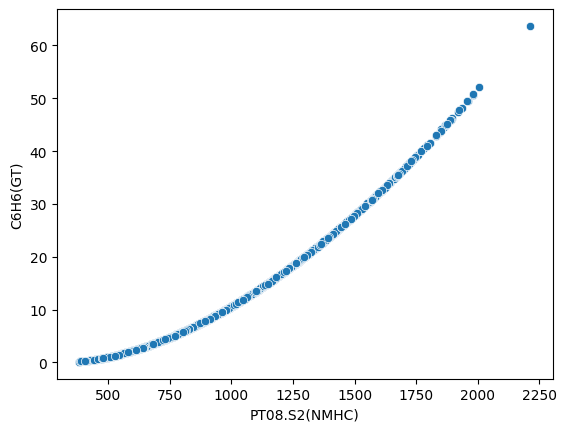

In [26]:
sns.scatterplot(air_quality_useful, x="PT08.S2(NMHC)", y="C6H6(GT)")

There is polynomial connection between C6H6 and PT08

<Axes: xlabel='NOx(GT)', ylabel='C6H6(GT)'>

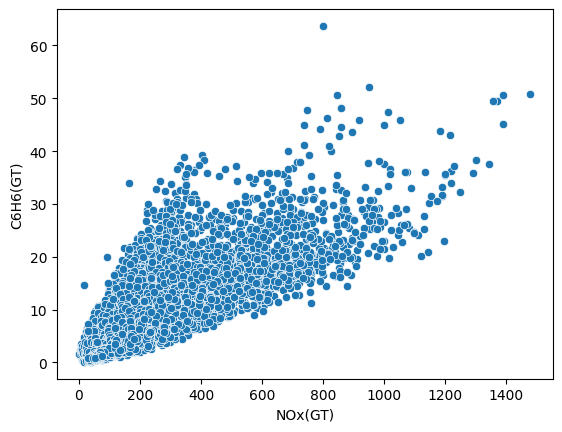

In [ ]:
sns.scatterplot(air_quality_useful, x="NOx(GT)", y="C6H6(GT)")

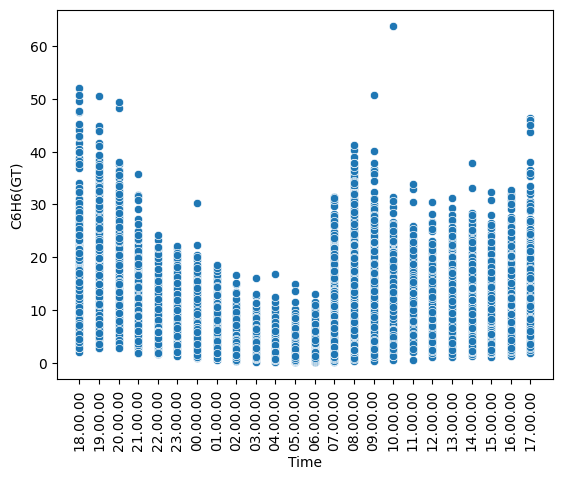

In [29]:
sns.scatterplot(air_quality_useful, x="Time", y="C6H6(GT)")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='NO2(GT)', ylabel='C6H6(GT)'>

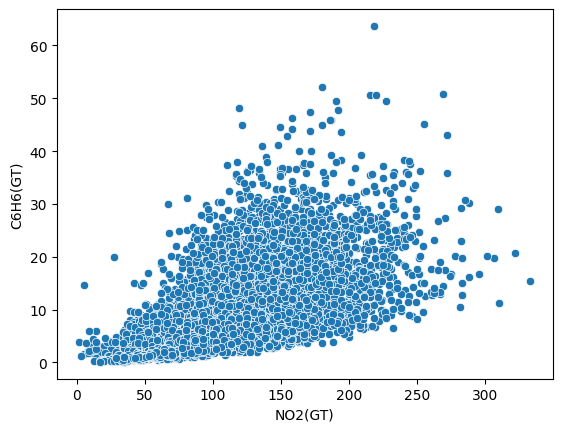

In [30]:
sns.scatterplot(air_quality_useful, x="NO2(GT)", y="C6H6(GT)")

<Axes: xlabel='RH', ylabel='C6H6(GT)'>

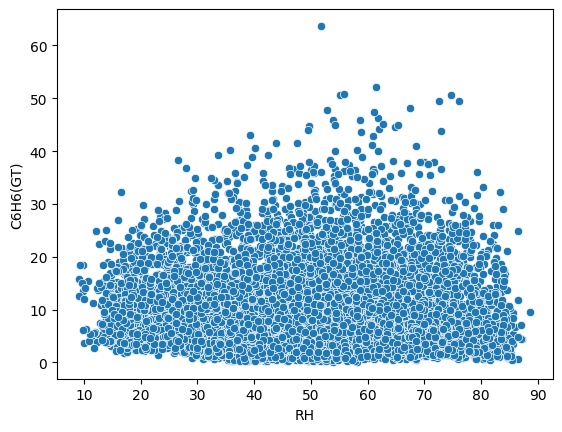

In [31]:
sns.scatterplot(air_quality_useful, x="RH", y="C6H6(GT)")

<Axes: xlabel='AH', ylabel='C6H6(GT)'>

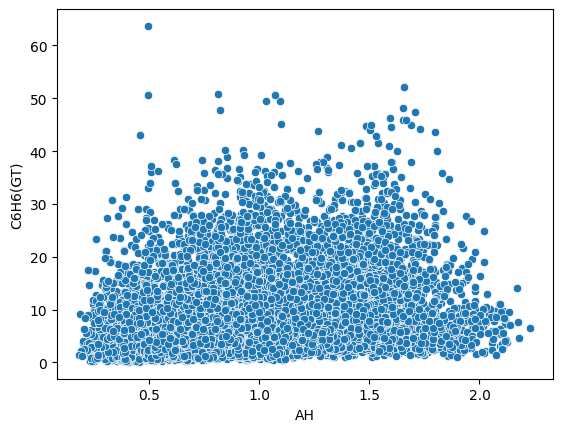

In [ ]:
sns.scatterplot(air_quality_useful, x="AH", y="C6H6(GT)")

### Features - Features


<Axes: xlabel='AH', ylabel='RH'>

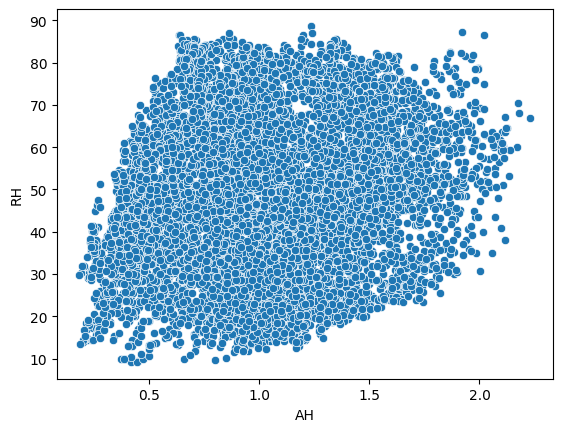

In [ ]:
sns.scatterplot(air_quality_useful, x="AH", y="RH")

<Axes: xlabel='AH', ylabel='T'>

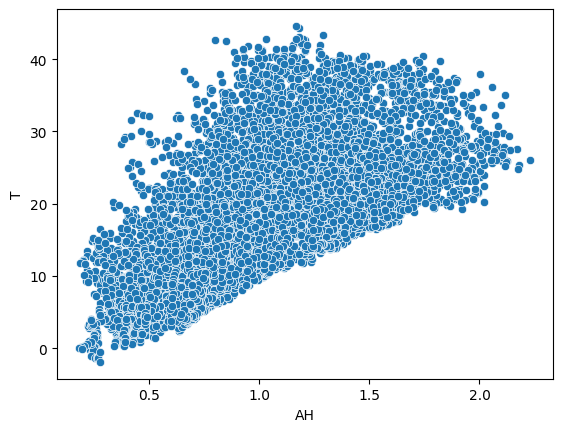

In [ ]:
sns.scatterplot(air_quality_useful, x="AH", y="T")

<Axes: xlabel='NOx(GT)', ylabel='RH'>

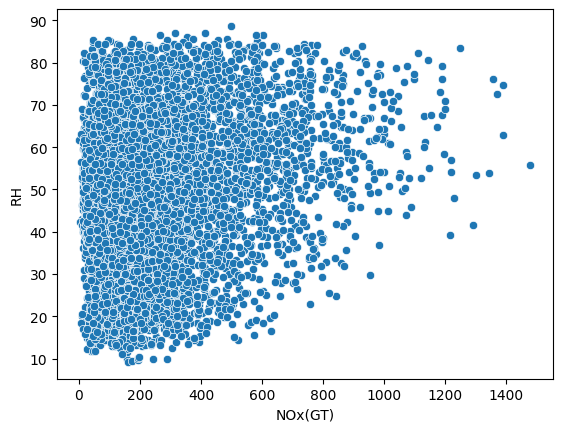

In [ ]:
sns.scatterplot(air_quality_useful, x="NOx(GT)", y="RH")

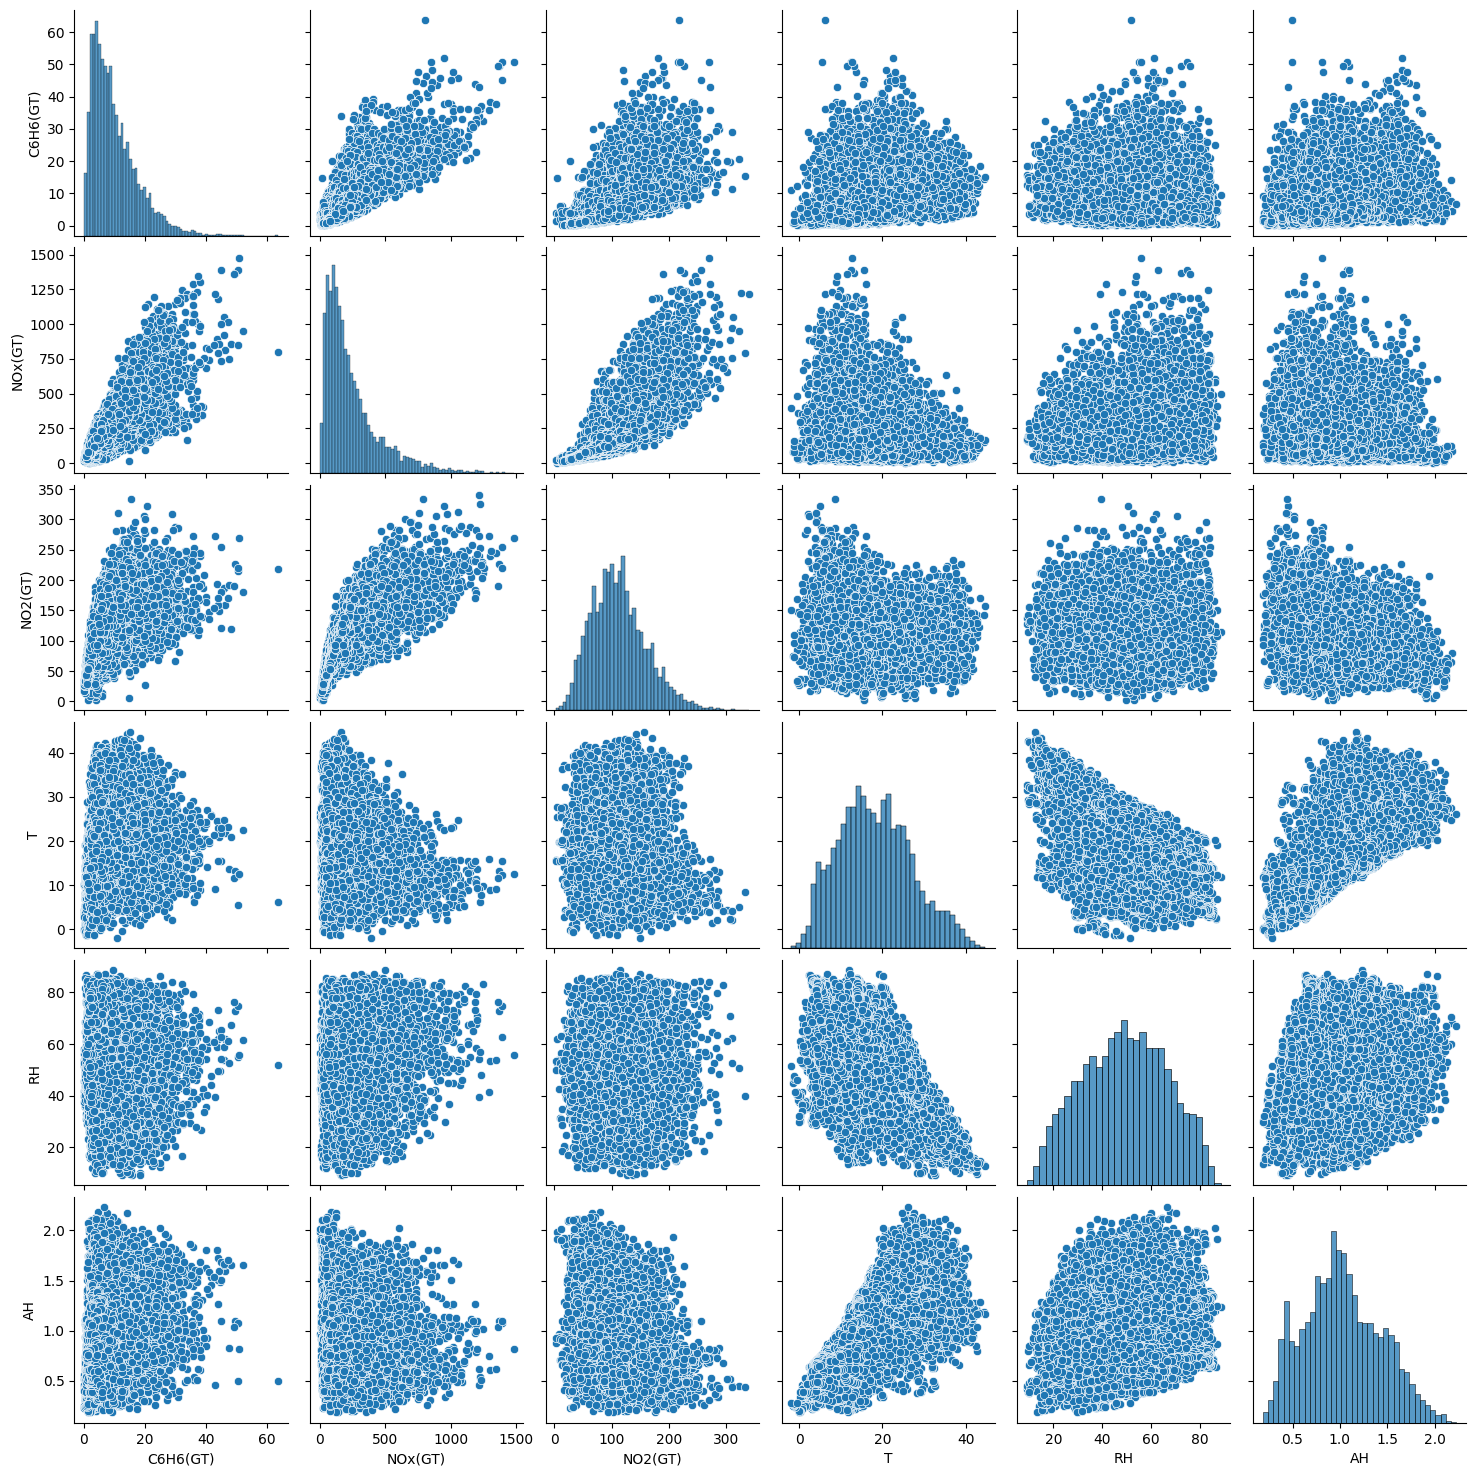

In [ ]:
sns.pairplot(air_quality_useful)

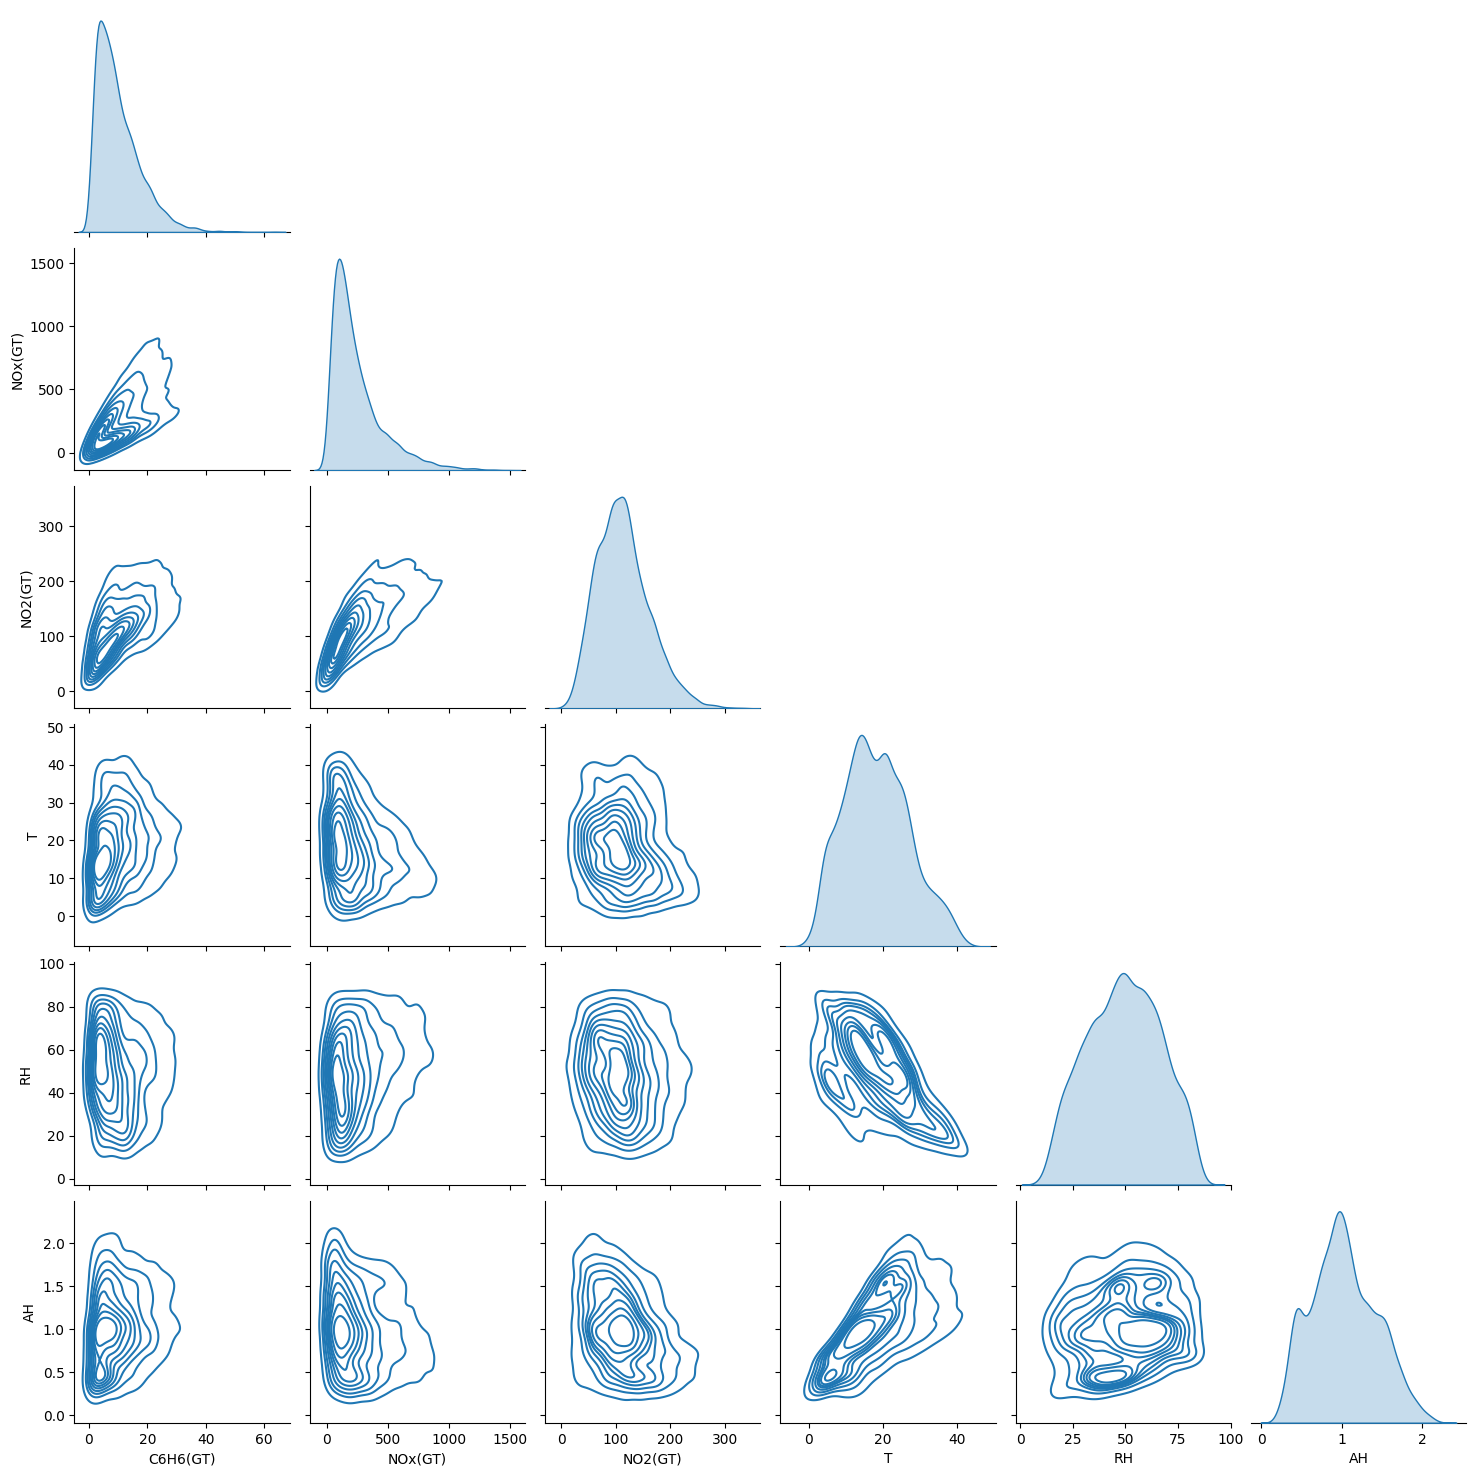

In [ ]:
sns.pairplot(air_quality_useful, corner=True, kind="kde")

### New features from data


In [32]:
# Convert 'Date' column to datetime format
air_quality_useful['Date'] = pd.to_datetime(air_quality_useful['Date'], format='%d/%m/%Y')

# Extract the month from the 'Date' column to use as a feature
air_quality_useful['Month'] = air_quality_useful['Date'].dt.month

<ipython-input-32-eb6c483638a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_useful['Date'] = pd.to_datetime(air_quality_useful['Date'], format='%d/%m/%Y')
<ipython-input-32-eb6c483638a5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_useful['Month'] = air_quality_useful['Date'].dt.month


In [33]:
air_quality_useful = air_quality_useful.drop(columns=['Date'])

In [34]:
air_quality_useful

Time  C6H6(GT)  NOx(GT)  PT08.S2(NMHC)  NO2(GT)     T    RH      AH  \
0     18.00.00      11.9    166.0         1046.0    113.0  13.6  48.9  0.7578   
1     19.00.00       9.4    103.0          955.0     92.0  13.3  47.7  0.7255   
2     20.00.00       9.0    131.0          939.0    114.0  11.9  54.0  0.7502   
3     21.00.00       9.2    172.0          948.0    122.0  11.0  60.0  0.7867   
4     22.00.00       6.5    131.0          836.0    116.0  11.2  59.6  0.7888   
...        ...       ...      ...            ...      ...   ...   ...     ...   
9352  10.00.00      13.5    472.0         1101.0    190.0  21.9  29.3  0.7568   
9353  11.00.00      11.4    353.0         1027.0    179.0  24.3  23.7  0.7119   
9354  12.00.00      12.4    293.0         1063.0    175.0  26.9  18.3  0.6406   
9355  13.00.00       9.5    235.0          961.0    156.0  28.3  13.5  0.5139   
9356  14.00.00      11.9    265.0         1047.0    168.0  28.5  13.1  0.5028   

      Month  
0         3  
1         3  
2         3  
3         3  
4         3  
...     ...  
9352      4  
9353      4  
9354      4  
9355      4  
9356      4  

[9357 rows x 9 columns]

### Rearrange columns

In [35]:
# Create a new order for the columns
column_order = ['Month'] + [col for col in air_quality_useful.columns if col not in ['Month', 'C6H6(GT)']] + ['C6H6(GT)']

# Rearrange the columns according to the new order
air_quality_useful = air_quality_useful[column_order]


### Drop missing rows in C6H6
As target row should not be containing Nan values

In [36]:
air_quality_useful = air_quality_useful.dropna(subset=['C6H6(GT)'])

### Standard Scaling Normalization

I chose Standard Scaler as standard scaling is typically used because regularization penalizes large coefficients

In [37]:
# Select columns to scale
columns_to_scale = ['C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'PT08.S2(NMHC)', 'T', 'RH', 'AH']

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply standard scaling and assign back to the DataFrame using .loc
air_quality_useful.loc[:, columns_to_scale] = standard_scaler.fit_transform(air_quality_useful[columns_to_scale])

In [38]:
air_quality_useful

Month      Time   NOx(GT)  PT08.S2(NMHC)   NO2(GT)         T        RH  \
0         3  18.00.00 -0.369317       0.400450  0.017950 -0.534197 -0.019300   
1         3  19.00.00 -0.674700       0.059391 -0.422987 -0.568166 -0.088601   
2         3  20.00.00 -0.538974      -0.000575  0.038946 -0.726687  0.275226   
3         3  21.00.00 -0.340232       0.033156  0.206922 -0.828594  0.621728   
4         3  22.00.00 -0.538974      -0.386608  0.080940 -0.805948  0.598628   
...     ...       ...       ...            ...       ...       ...       ...   
9352      4  10.00.00  1.113974       0.606584  1.634716  0.405607 -1.151206   
9353      4  11.00.00  0.537139       0.329240  1.403750  0.677358 -1.474608   
9354      4  12.00.00  0.246298       0.464164  1.319762  0.971755 -1.786459   
9355      4  13.00.00 -0.034849       0.081879  0.920819  1.130276 -2.063661   
9356      4  14.00.00  0.110572       0.404198  1.172783  1.152922 -2.086761   

            AH  C6H6(GT)  
0    -0.663043  0.243898  
1    -0.743035 -0.091699  
2    -0.681865 -0.145395  
3    -0.591471 -0.118547  
4    -0.586271 -0.480992  
...        ...       ...  
9352 -0.665520  0.458680  
9353 -0.776716  0.176778  
9354 -0.953293  0.311017  
9355 -1.267070 -0.078275  
9356 -1.294559  0.243898  

[8991 rows x 9 columns]

### One Hot encoding for time

In [39]:
# Using pandas get_dummies for one-hot encoding
air_quality_useful = pd.get_dummies(air_quality_useful, columns=['Time'], drop_first=True)

In [40]:
# Using pandas get_dummies for one-hot encoding
air_quality_useful = pd.get_dummies(air_quality_useful, columns=['Month'], drop_first=True)

In [41]:
air_quality_useful

NOx(GT)  PT08.S2(NMHC)   NO2(GT)         T        RH        AH  \
0    -0.369317       0.400450  0.017950 -0.534197 -0.019300 -0.663043   
1    -0.674700       0.059391 -0.422987 -0.568166 -0.088601 -0.743035   
2    -0.538974      -0.000575  0.038946 -0.726687  0.275226 -0.681865   
3    -0.340232       0.033156  0.206922 -0.828594  0.621728 -0.591471   
4    -0.538974      -0.386608  0.080940 -0.805948  0.598628 -0.586271   
...        ...            ...       ...       ...       ...       ...   
9352  1.113974       0.606584  1.634716  0.405607 -1.151206 -0.665520   
9353  0.537139       0.329240  1.403750  0.677358 -1.474608 -0.776716   
9354  0.246298       0.464164  1.319762  0.971755 -1.786459 -0.953293   
9355 -0.034849       0.081879  0.920819  1.130276 -2.063661 -1.267070   
9356  0.110572       0.404198  1.172783  1.152922 -2.086761 -1.294559   

      C6H6(GT)  Time_01.00.00  Time_02.00.00  Time_03.00.00  ...  Month_3  \
0     0.243898              0              0              0  ...        1   
1    -0.091699              0              0              0  ...        1   
2    -0.145395              0              0              0  ...        1   
3    -0.118547              0              0              0  ...        1   
4    -0.480992              0              0              0  ...        1   
...        ...            ...            ...            ...  ...      ...   
9352  0.458680              0              0              0  ...        0   
9353  0.176778              0              0              0  ...        0   
9354  0.311017              0              0              0  ...        0   
9355 -0.078275              0              0              0  ...        0   
9356  0.243898              0              0              0  ...        0   

      Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  \
0           0        0        0        0        0        0         0   
1           0        0        0        0        0        0         0   
2           0        0        0        0        0        0         0   
3           0        0        0        0        0        0         0   
4           0        0        0        0        0        0         0   
...       ...      ...      ...      ...      ...      ...       ...   
9352        1        0        0        0        0        0         0   
9353        1        0        0        0        0        0         0   
9354        1        0        0        0        0        0         0   
9355        1        0        0        0        0        0         0   
9356        1        0        0        0        0        0         0   

      Month_11  Month_12  
0            0         0  
1            0         0  
2            0         0  
3            0         0  
4            0         0  
...        ...       ...  
9352         0         0  
9353         0         0  
9354         0         0  
9355         0         0  
9356         0         0  

[8991 rows x 41 columns]

### Missing values


In [42]:
missing_value_counts = air_quality_useful.isnull().sum()

In [43]:
missing_value_counts

NOx(GT)          1595
PT08.S2(NMHC)       0
NO2(GT)          1598
T                   0
RH                  0
AH                  0
C6H6(GT)            0
Time_01.00.00       0
Time_02.00.00       0
Time_03.00.00       0
Time_04.00.00       0
Time_05.00.00       0
Time_06.00.00       0
Time_07.00.00       0
Time_08.00.00       0
Time_09.00.00       0
Time_10.00.00       0
Time_11.00.00       0
Time_12.00.00       0
Time_13.00.00       0
Time_14.00.00       0
Time_15.00.00       0
Time_16.00.00       0
Time_17.00.00       0
Time_18.00.00       0
Time_19.00.00       0
Time_20.00.00       0
Time_21.00.00       0
Time_22.00.00       0
Time_23.00.00       0
Month_2             0
Month_3             0
Month_4             0
Month_5             0
Month_6             0
Month_7             0
Month_8             0
Month_9             0
Month_10            0
Month_11            0
Month_12            0
dtype: int64

In [44]:

# Create a SimpleImputer for mean imputation
imputer = SimpleImputer(strategy='mean')

# Define the columns with missing values
columns_with_missing = ['NOx(GT)', 'NO2(GT)']

# Impute missing values with the mean for the specified columns
air_quality_useful[columns_with_missing] = imputer.fit_transform(air_quality_useful[columns_with_missing])

In [45]:
air_quality_useful

NOx(GT)  PT08.S2(NMHC)   NO2(GT)         T        RH        AH  \
0    -0.369317       0.400450  0.017950 -0.534197 -0.019300 -0.663043   
1    -0.674700       0.059391 -0.422987 -0.568166 -0.088601 -0.743035   
2    -0.538974      -0.000575  0.038946 -0.726687  0.275226 -0.681865   
3    -0.340232       0.033156  0.206922 -0.828594  0.621728 -0.591471   
4    -0.538974      -0.386608  0.080940 -0.805948  0.598628 -0.586271   
...        ...            ...       ...       ...       ...       ...   
9352  1.113974       0.606584  1.634716  0.405607 -1.151206 -0.665520   
9353  0.537139       0.329240  1.403750  0.677358 -1.474608 -0.776716   
9354  0.246298       0.464164  1.319762  0.971755 -1.786459 -0.953293   
9355 -0.034849       0.081879  0.920819  1.130276 -2.063661 -1.267070   
9356  0.110572       0.404198  1.172783  1.152922 -2.086761 -1.294559   

      C6H6(GT)  Time_01.00.00  Time_02.00.00  Time_03.00.00  ...  Month_3  \
0     0.243898              0              0              0  ...        1   
1    -0.091699              0              0              0  ...        1   
2    -0.145395              0              0              0  ...        1   
3    -0.118547              0              0              0  ...        1   
4    -0.480992              0              0              0  ...        1   
...        ...            ...            ...            ...  ...      ...   
9352  0.458680              0              0              0  ...        0   
9353  0.176778              0              0              0  ...        0   
9354  0.311017              0              0              0  ...        0   
9355 -0.078275              0              0              0  ...        0   
9356  0.243898              0              0              0  ...        0   

      Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  \
0           0        0        0        0        0        0         0   
1           0        0        0        0        0        0         0   
2           0        0        0        0        0        0         0   
3           0        0        0        0        0        0         0   
4           0        0        0        0        0        0         0   
...       ...      ...      ...      ...      ...      ...       ...   
9352        1        0        0        0        0        0         0   
9353        1        0        0        0        0        0         0   
9354        1        0        0        0        0        0         0   
9355        1        0        0        0        0        0         0   
9356        1        0        0        0        0        0         0   

      Month_11  Month_12  
0            0         0  
1            0         0  
2            0         0  
3            0         0  
4            0         0  
...        ...       ...  
9352         0         0  
9353         0         0  
9354         0         0  
9355         0         0  
9356         0         0  

[8991 rows x 41 columns]

### Feature Engineering

As I have negative values because of Standard Scaling I cant use log transforms so I will choose polynomial transforms

In [46]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Replace 'sample_size' with the actual number of rows in 'air_quality_useful'
sample_size = len(air_quality_useful)

# Polynomial transformation
degree = 2  # Degree can be adjusted based on the analysis
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

# Transform 'PT08.S2(NMHC)' with polynomial features
X_poly = poly_features.fit_transform(air_quality_useful[['PT08.S2(NMHC)']])

# Target variable 'C6H6(GT)'
y = air_quality_useful['C6H6(GT)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the training and test datasets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the performance metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

(train_rmse, test_rmse, train_r2, test_r2)

(0.010629124494047746,
 0.010415325397062133,
 0.99988593190866,
 0.9998952372546398)

### Regression

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'air_quality_useful' is your DataFrame

# Prepare the feature matrix 'X' by selecting all columns except the target variable 'C6H6(GT)'
X = air_quality_useful.drop('C6H6(GT)', axis=1)

# Prepare the target vector 'y' which is just the 'C6H6(GT)' column
y = air_quality_useful['C6H6(GT)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Output the performance metrics
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

RMSE: 0.1605205854476706
R-squared: 0.975115858898908


In [58]:
from sklearn.metrics import mean_absolute_error

# Predict on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MAE for training and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Output the MAE, RMSE, and R-squared for the test set
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Test R-squared: {r2_score(y_test, y_test_pred)}")

# Output the MAE, RMSE, and R-squared for the training set
print(f"Train MAE: {mae_train}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}")
print(f"Train R-squared: {r2_score(y_train, y_train_pred)}")

Test MAE: 0.11450758093131917
Test RMSE: 0.1605205854476706
Test R-squared: 0.975115858898908
Train MAE: 0.1116493910603303
Train RMSE: 0.15699506408569328
Train R-squared: 0.9751147972175739


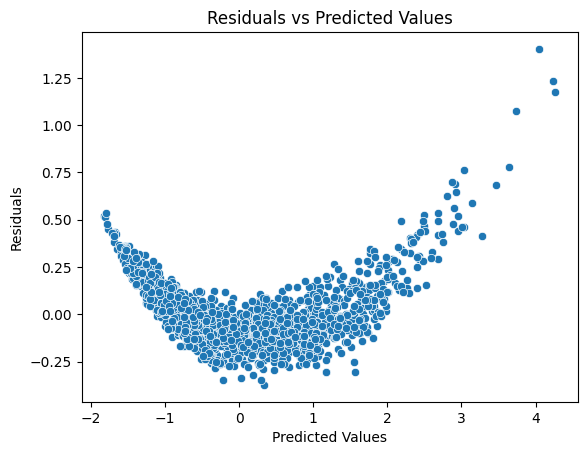

In [60]:

# Predict the values using the model
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Create the scatterplot of predicted values vs residuals
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

I am conserned about this plot as it is not randomly scattered so I will drop 'PT08'


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assume 'air_quality_useful' is your DataFrame

# Prepare the feature matrix 'X' by selecting all columns except the target variable 'C6H6(GT)'
X = air_quality_useful.drop(['C6H6(GT)', 'PT08.S2(NMHC)'], axis=1)

# Prepare the target vector 'y' which is just the 'C6H6(GT)' column
y = air_quality_useful['C6H6(GT)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Output the performance metrics
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

RMSE: 0.5396049705307076
R-squared: 0.718801455632788


In [63]:
from sklearn.metrics import mean_absolute_error

# Predict on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MAE for training and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Output the MAE, RMSE, and R-squared for the test set
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Test R-squared: {r2_score(y_test, y_test_pred)}")

# Output the MAE, RMSE, and R-squared for the training set
print(f"Train MAE: {mae_train}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}")
print(f"Train R-squared: {r2_score(y_train, y_train_pred)}")

Test MAE: 0.38573175912227053
Test RMSE: 0.5396049705307076
Test R-squared: 0.718801455632788
Train MAE: 0.3891169148499346
Train RMSE: 0.5443305266592715
Train R-squared: 0.7008461691664405


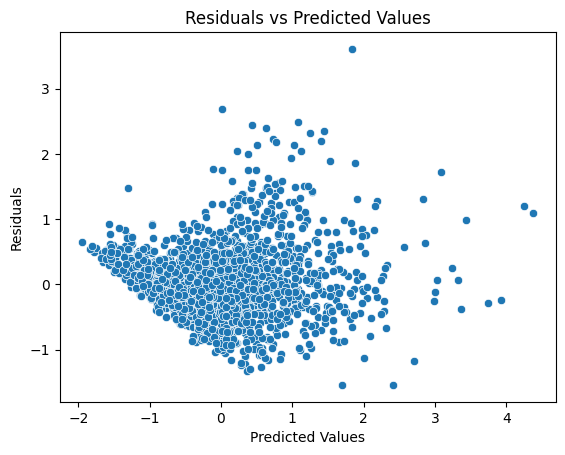

In [64]:

# Predict the values using the model
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Create the scatterplot of predicted values vs residuals
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [75]:
X.assign(pred = predictions).assign(actual = y).sample(5)

const       NOx(GT)       NO2(GT)         T        RH        AH  \
591     1.0  7.685698e-17  1.230211e-16 -0.024665  0.032675  0.004135   
3654    1.0 -1.014015e+00 -1.325857e+00  1.028369  0.332977  2.370463   
184     1.0  5.177495e-01  7.948374e-01 -0.058633 -0.504403 -0.506526   
5879    1.0  1.608404e+00 -1.290293e-01 -0.851240  0.483127 -0.689047   
2466    1.0 -7.425629e-01 -1.710232e-01  1.345412 -1.803784 -0.654375   

      Time_01.00.00  Time_02.00.00  Time_03.00.00  Time_04.00.00  ...  \
591               0              0              0              0  ...   
3654              0              0              0              0  ...   
184               0              0              0              0  ...   
5879              0              0              0              0  ...   
2466              0              0              0              0  ...   

      Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  \
591         0        0        0        0        0         0         0   
3654        0        0        0        1        0         0         0   
184         0        0        0        0        0         0         0   
5879        0        0        0        0        0         0         1   
2466        0        1        0        0        0         0         0   

      Month_12      pred    actual  
591          0 -0.007447 -0.279634  
3654         0 -0.381056 -0.413873  
184          0  0.438338  1.505744  
5879         0  0.712646  0.297594  
2466         0 -0.169727 -0.172243  

[5 rows x 42 columns]

### Cross Validation Scores


In [77]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# Assume 'air_quality_useful' is your DataFrame

# Prepare the feature matrix 'X' and target vector 'y'
X = air_quality_useful.drop(['C6H6(GT)', 'PT08.S2(NMHC)'], axis=1)
y = air_quality_useful['C6H6(GT)']

# Create a linear regression model
model = LinearRegression()

# Define the number of folds for cross-validation
n_folds = 5

# Create a KFold object with the number of folds
kf = KFold(n_folds, shuffle=True, random_state=42)

# Perform cross-validation
# 'neg_mean_squared_error' returns the negative of the MSE, so we take its absolute value
mse_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)

# Calculate RMSE for each fold
rmse_scores = np.sqrt(mse_scores)

# Calculate mean RMSE
mean_rmse = np.mean(rmse_scores)

# Calculate standard deviation of RMSE
std_rmse = np.std(rmse_scores)

# Calculate R-squared scores
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=kf)

# Calculate mean and standard deviation of R-squared
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Output the performance metrics
print(f"Mean RMSE: {mean_rmse}")
print(f"Std. Deviation of RMSE: {std_rmse}")
print(f"Mean R-squared: {mean_r2}")
print(f"Std. Deviation of R-squared: {std_r2}")

Mean RMSE: 0.5463830213560567
Std. Deviation of RMSE: 0.009814023274829076
Mean R-squared: 0.7007294429820872
Std. Deviation of R-squared: 0.013003622338633282


### Hyperparameter tuning


In [81]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

# Assume 'air_quality_useful' is your DataFrame

# Prepare the feature matrix 'X' and target vector 'y'
X = air_quality_useful.drop(['C6H6(GT)', 'PT08.S2(NMHC)'], axis=1)
y = air_quality_useful['C6H6(GT)']

# Define a range of alpha values for Ridge
alpha_range = np.logspace(-4, 4, 50)

# Create a Ridge regression model
ridge_model = Ridge()

# Create a KFold object for cross-validation
kf = KFold(5, shuffle=True, random_state=42)

# Setup GridSearchCV
grid = GridSearchCV(estimator=ridge_model, param_grid=dict(alpha=alpha_range), cv=kf, scoring='neg_mean_squared_error')

# Perform the grid search
grid.fit(X, y)

# Best alpha value
best_alpha = grid.best_estimator_.alpha

# Output the best alpha value
print(f"Best alpha: {best_alpha}")

# You can also retrain your model with this best alpha if needed
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X, y)

# Optionally, assess the model's performance
# This can be done by evaluating the model on a separate test set or using cross-validation again


Best alpha: 2.559547922699533


Ridge(alpha=2.559547922699533)

### Ridge

In [83]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Assume 'air_quality_useful' is your DataFrame

# Prepare the feature matrix 'X' and target vector 'y'
X = air_quality_useful.drop(['C6H6(GT)', 'PT08.S2(NMHC)'], axis=1)
y = air_quality_useful['C6H6(GT)']

# Define the alpha (regularization strength) for Ridge
# Typically, this is chosen via a hyperparameter tuning process like GridSearchCV
alpha = 2.559547922699533

# Create a Ridge regression model
model = Ridge(alpha=alpha)

# Define the number of folds for cross-validation
n_folds = 5

# Create a KFold object with the number of folds
kf = KFold(n_folds, shuffle=True, random_state=42)

# Perform cross-validation for RMSE
mse_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
rmse_scores = np.sqrt(mse_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Perform cross-validation for R-squared
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=kf)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Output the performance metrics
print(f"Mean RMSE with Ridge: {mean_rmse}")
print(f"Std. Deviation of RMSE with Ridge: {std_rmse}")
print(f"Mean R-squared with Ridge: {mean_r2}")
print(f"Std. Deviation of R-squared with Ridge: {std_r2}")

Mean RMSE with Ridge: 0.5463647439278608
Std. Deviation of RMSE with Ridge: 0.009820237643410678
Mean R-squared with Ridge: 0.7007473715483845
Std. Deviation of R-squared with Ridge: 0.013053380068899861


### Gradient Descent

In [85]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Example usage
# Assume X_train, y_train, X_test, and y_test are your data

# Create the model
# You can tune hyperparameters like 'learning_rate', 'eta0' (initial learning rate), and 'max_iter'
model = SGDRegressor(max_iter=1000, tol=1e-3)

# Fit the model
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2919069520540834
